In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 正常显示中文
plt.rcParams['font.sans-serif'] = ['KaiTi']

# 正常显示符号
plt.rcParams['axes.unicode_minus'] = False

# 读取文件
excel_file = pd.ExcelFile('折射率与薄膜厚度计算结果_15°.xlsx')

# 获取所有表名
sheet_names = excel_file.sheet_names
sheet_names

['垂直入射_空气折射率n1',
 '垂直入射_薄膜厚度e',
 '斜入射s偏振_空气折射率n1',
 '斜入射s偏振_薄膜厚度e',
 '斜入射p偏振_空气折射率n1',
 '斜入射p偏振_薄膜厚度e']

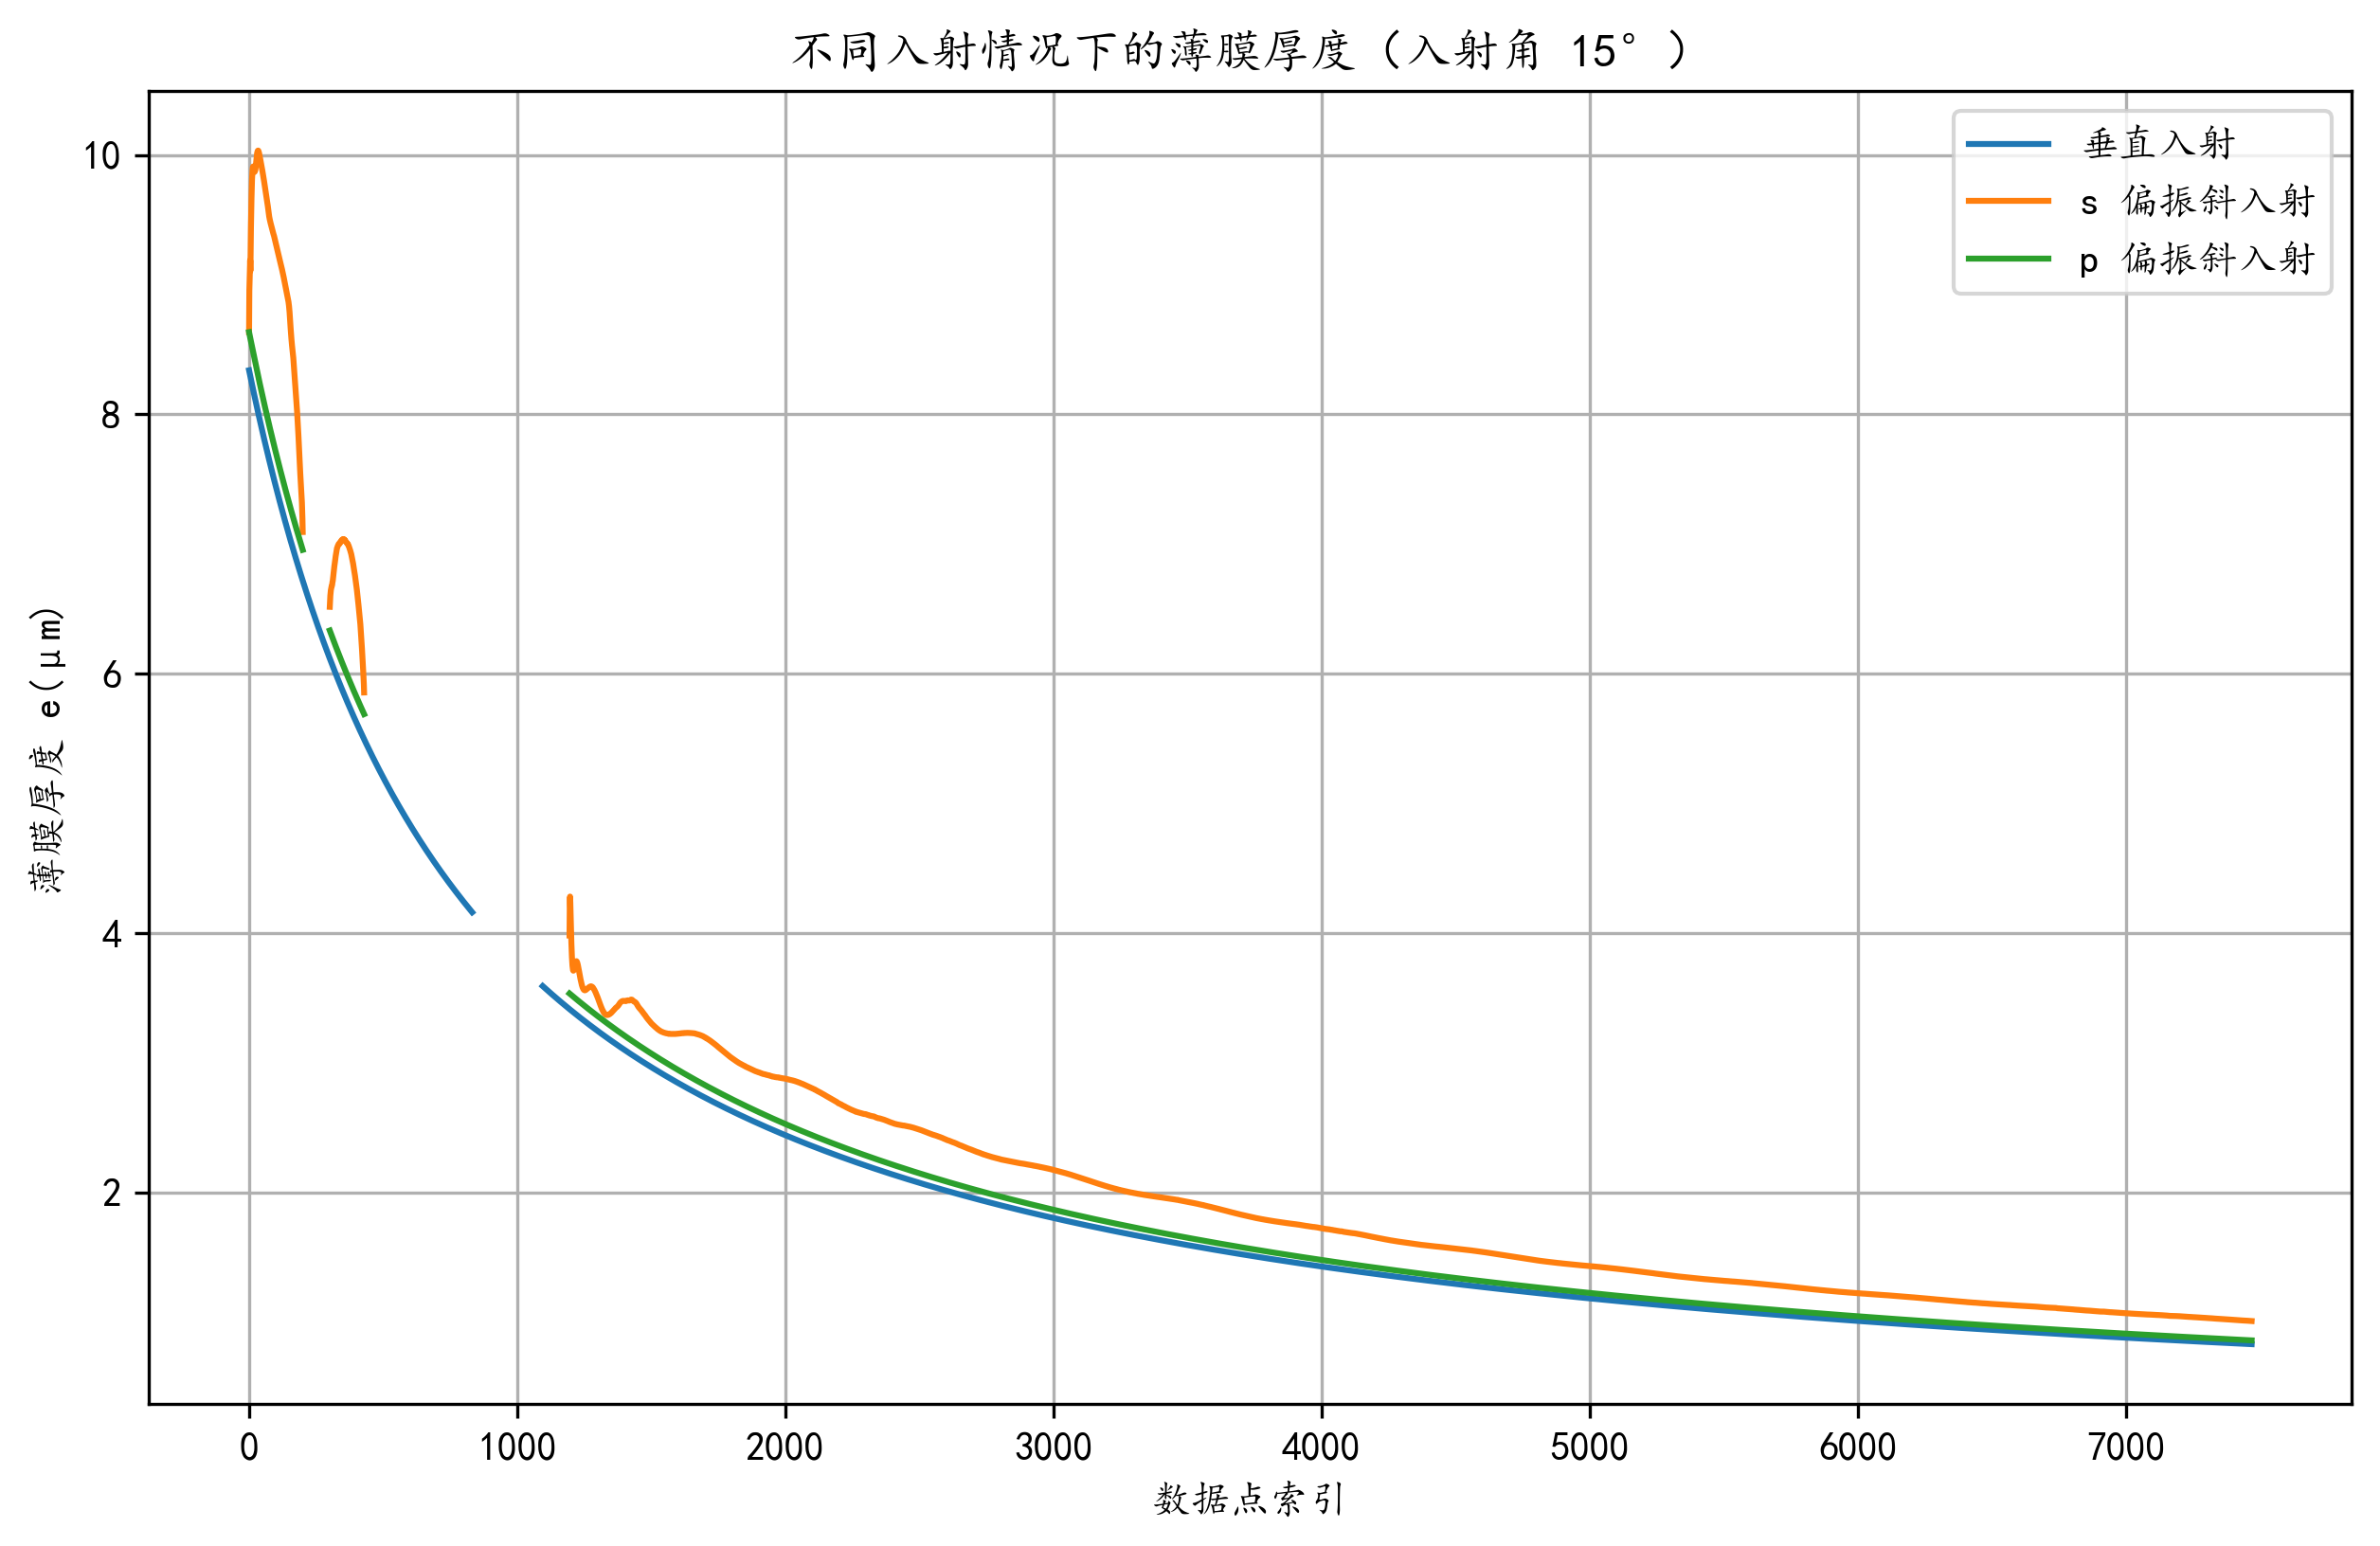

In [2]:
# 获取相应工作表数据
df_vertical = excel_file.parse('垂直入射_薄膜厚度e')
df_s_polarized = excel_file.parse('斜入射s偏振_薄膜厚度e')
df_p_polarized = excel_file.parse('斜入射p偏振_薄膜厚度e')

# 获取薄膜厚度列
vertical_thickness = df_vertical['薄膜厚度e(μm)']
s_polarized_thickness = df_s_polarized['薄膜厚度e(μm)']
p_polarized_thickness = df_p_polarized['薄膜厚度e(μm)']

# 生成 x 轴索引
x = range(1, len(vertical_thickness) + 1)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(x, vertical_thickness, label='垂直入射')
plt.plot(x, s_polarized_thickness, label='s 偏振斜入射')
plt.plot(x, p_polarized_thickness, label='p 偏振斜入射')

# 设置图表标题和坐标轴标签
plt.title('不同入射情况下的薄膜厚度（入射角 15°）')
plt.xlabel('数据点索引')
plt.ylabel('薄膜厚度 e(μm)')

# 显示图例
plt.legend()

# 显示网格线
plt.grid(True)

# 保存图像
plt.savefig('薄膜厚度可视化_15°.png')

# 显示图表
plt.show()

In [3]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side, Alignment

# 获取相应工作表数据
df_vertical = excel_file.parse('垂直入射_薄膜厚度e')
df_s_polarized = excel_file.parse('斜入射s偏振_薄膜厚度e')
df_p_polarized = excel_file.parse('斜入射p偏振_薄膜厚度e')

# 选择部分结果，这里以展示前 10 条数据为例
partial_vertical = df_vertical.head(10)
partial_s_polarized = df_s_polarized.head(10)
partial_p_polarized = df_p_polarized.head(10)

# 合并数据
merged_data = pd.concat([
    partial_vertical[['波数q(cm⁻¹)', '薄膜厚度e(μm)']].rename(columns={'薄膜厚度e(μm)': '垂直入射薄膜厚度e(μm)'}),
    partial_s_polarized[['薄膜厚度e(μm)']].rename(columns={'薄膜厚度e(μm)': 's偏振斜入射薄膜厚度e(μm)'}),
    partial_p_polarized[['薄膜厚度e(μm)']].rename(columns={'薄膜厚度e(μm)': 'p偏振斜入射薄膜厚度e(μm)'})
], axis=1)

# 创建工作簿
wb = Workbook()
ws = wb.active

# 写入表头
ws.append(merged_data.columns.tolist())

# 写入数据
for row in merged_data.values.tolist():
    ws.append(row)

# 设置字体
font = Font(name='宋体', size=12)

# 设置边框样式
thin_border = Border(left=Side(style='thin'), 
                     right=Side(style='thin'), 
                     top=Side(style='thin'), 
                     bottom=Side(style='thin'))

# 设置对齐方式
alignment = Alignment(horizontal='center', vertical='center')

# 应用样式到单元格
for row in ws.iter_rows():
    for cell in row:
        cell.font = font
        cell.border = thin_border
        cell.alignment = alignment

# 绘制三线表，加粗表头上下边框
for cell in ws[1]:
    cell.border = Border(top=Side(style='thick'), 
                         bottom=Side(style='thick'), 
                         left=Side(style='thin'), 
                         right=Side(style='thin'))

# 保存文件
wb.save('薄膜厚度三线表_10°.xlsx')

# 分析薄膜厚度与波数的规律
print('薄膜厚度与波数的规律分析：')
print('垂直入射时，相关系数：', merged_data['波数q(cm⁻¹)'].corr(merged_data['垂直入射薄膜厚度e(μm)']))
print('s偏振斜入射时，相关系数：', merged_data['波数q(cm⁻¹)'].corr(merged_data['s偏振斜入射薄膜厚度e(μm)']))
print('p偏振斜入射时，相关系数：', merged_data['波数q(cm⁻¹)'].corr(merged_data['p偏振斜入射薄膜厚度e(μm)']))

薄膜厚度与波数的规律分析：
垂直入射时，相关系数： -0.9999953935758926
s偏振斜入射时，相关系数： 0.9635991189889977
p偏振斜入射时，相关系数： -0.9999558709481645
